### Блок импорта библиотек

In [173]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression #
from sklearn.svm import SVC # SVM для классификации
from sklearn.ensemble import  RandomForestClassifier#Деревья решений
from sklearn.neighbors import KNeighborsClassifier #К-ближ. соседей
from sklearn.model_selection import train_test_split #модель разбиения данных на тест и обучение
from sklearn.preprocessing import StandardScaler, MinMaxScaler,scale #Модель нормализации данных
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Исследование данных

#### Описание данных

    Дана выборка из замеров показателей геолого разведки, связанный с свойствами пород (физико-химические показатели)
    ff2-ff1 показатели времени начала и окончания эксперимента (замера)
    id- глубина залегания породы
    f1,f5-некий булев признак
    y-целевая колонка где имеются метки 0-1-2 (характеристики коллекторских свойств), 0-не коллектор, 1-слабый коллектор, 2-сильный коллектор.
    Остальные fi-ые вещественные признаки некоторые физико-хим. свойства пласта на различной глубине залегания

In [181]:
#Загрузка данных
data=pd.read_excel('/Users/ekaterinamensikova/Downloads/Geological_data-4.xlsx')

In [182]:
data.head(50)

,Id,y,ff2,f1,f2,f3,f4,f5,f6,f7,...,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36
0,1187175,0.0,2015-12-01,False,NaN,36.583333,2.01,True,3.660,105.0,...,7.700000e-01,39.680000,1.650000e+00,38.030000,2.440000,2.650000,2.560000,2.530000,NaN,NaN
1,1187176,0.0,2015-12-01,False,NaN,16.416667,1.40,True,3.080,31.0,...,1.130000e+00,33.530000,1.110000e+00,32.420000,2.850000,2.050000,2.470000,2.180000,NaN,NaN
2,1187177,0.0,2015-12-01,False,NaN,29.333333,2.25,True,1.850,49.0,...,3.200000e-01,35.250000,1.710000e+00,33.540000,1.310000,1.240000,1.340000,1.460000,True,NaN
3,1187178,0.0,2015-12-01,False,NaN,41.666667,2.25,True,1.480,60.0,...,1.000000e-02,14.190000,2.200000e-01,13.970000,2.960000,1.710000,0.990000,1.020000,NaN,NaN
4,1187452,0.0,2015-12-01,False,NaN,22.750000,1.36,True,7.370,30.0,...,4.000000e-02,85.190000,1.500000e+00,83.690000,6.810000,4.910000,5.500000,6.330000,NaN,NaN
5,1187556,0.0,2015-12-02,False,NaN,32.666667,2.25,True,1.440,84.0,...,8.800000e-01,14.710000,9.000000e-02,14.620000,1.480000,1.710000,1.360000,0.960000,NaN,NaN
6,1187725,0.0,2015-12-02,False,NaN,28.750000,1.38,True,2.330,151.0,...,2.300000e-01,57.920000,4.160000e+00,53.760000,1.560000,4.200000,3.170000,2.470000,NaN,NaN
7,1187727,0.0,2015-12-02,False,NaN,28.583333,1.88,True,5.230,28.0,...,1.000000e-02,62.340000,NaN,62.340000,7.940000,4.440000,5.090000,3.490000,NaN,NaN
8,1187874,0.0,2015-12-02,False,NaN,26.500000,1.49,True,1.340,171.0,...,5.200000e-01,43.470000,NaN,43.470000,0.890000,3.120000,5.210000,3.480000,NaN,NaN
9,1187876,0.0,2015-12-02,False,NaN,23.916667,1.56,True,1.800,53.0,...,1.000000e-01,18.960000,5.000000e-02,18.900000,1.710000,1.320000,1.200000,1.580000,NaN,NaN


In [183]:
"""Распределение целевого признака"""
data.S.hist()

AttributeError: 'DataFrame' object has no attribute 'S'

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1701 entries, 0 to 1700
Data columns (total 39 columns):
Id     1701 non-null int64
y      183 non-null float64
ff2    1701 non-null datetime64[ns]
f1     183 non-null object
f2     0 non-null float64
f3     183 non-null float64
f4     183 non-null float64
f5     183 non-null object
f6     183 non-null float64
f7     183 non-null float64
f8     183 non-null float64
f9     183 non-null float64
f10    183 non-null float64
f11    183 non-null float64
f12    183 non-null float64
f13    183 non-null float64
f14    183 non-null float64
f15    183 non-null float64
f16    183 non-null float64
f17    183 non-null float64
f18    183 non-null float64
f19    183 non-null float64
f20    176 non-null float64
f21    176 non-null float64
f22    176 non-null float64
f23    25 non-null float64
f24    176 non-null float64
f25    31 non-null float64
f26    176 non-null float64
f27    129 non-null float64
f28    176 non-null float64
f29    87 non-null float

In [179]:
"""Выделим имена колонок для этого воспользуемся циклом FOR"""
for i in data.columns:
    print(i)

id
data
point
MerkS
Br
Medium DNP
Malein number
Cu plastina
Medium OI
Medium OM
density
S
Aromatic
Benzol
Izoparafiny
Nafteny
Н-parafiny
Н-parafiny+Izoparafiny
Olefiny
Smoly
10С
5С
50С
90С
95С
Exit
boil-end
boil-start


### Создание признаков на основе времени

In [180]:
def season_type(x):
    if x in [12,1,11,2]:
        return 'winter'
    if x in [9,10]:
        return 'autumn'
    if x in [3,4,5]:
        return 'spring'
    return 'summer'

In [166]:
import datetime
data['exp_days']=(data['ff1']-data['ff2'])
data['exp_days']=[day.days for day in data['exp_days']]

KeyError: 'ff1'

In [16]:
data['start_month_exp']=data['ff2'].dt.month
data['start_month_season']=data['start_month_exp'].map(lambda x: season_type(x))

In [17]:
data['end_month_exp']=data['ff1'].dt.month
data['end_month_season']=data['end_month_exp'].map(lambda x: season_type(x))

### Обработка булевых признаков

In [18]:
data['f5']=data['f5'].map(lambda x:1 if x else 0)

In [19]:
data['f1']=data['f1'].map(lambda x:1 if x else 0)

In [20]:
bin_col=['f1','f5']

### Предобработка данных

In [21]:
"""Признаки f35,36,29,25,23 имеют пропусков более 50%"""
data.drop(['f35','f36','f29','f23','f25'],axis=1,inplace=True)

In [22]:
data.describe()

,Id,y,f1,f2,f3,f4,f5,f6,f7,f8,...,f27,f28,f30,f31,f32,f33,f34,exp_days,start_month_exp,end_month_exp
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,1.290000e+02,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,183.000000,183.000000,183.000000
mean,4188.846995,0.459016,0.005464,31.903497,32.948140,1.738798,0.961749,2.633760,71.775956,0.413716,...,2.070239e+07,33.990939,32.496819,2.737313,2.515551,2.391053,2.190306,631.808743,6.415301,10.382514
std,210.461055,0.693148,0.073922,60.448195,42.630655,0.456760,0.192329,5.791967,94.610765,0.268384,...,1.200928e+08,62.054282,59.715112,5.380930,4.880478,4.774245,4.258132,500.992204,3.103027,2.977225
min,3902.000000,0.000000,0.000000,0.050000,0.166667,0.550000,0.000000,0.000000,1.000000,0.040000,...,0.000000e+00,0.052500,0.052500,0.000000,0.000000,0.000000,0.000000,93.000000,1.000000,1.000000
25%,4021.500000,0.000000,0.000000,3.385000,5.041667,1.305000,1.000000,0.000000,7.000000,0.200000,...,4.000000e-02,4.060000,4.007500,0.092590,0.106832,0.120000,0.136070,251.500000,4.000000,9.000000
50%,4118.000000,0.000000,0.000000,12.990000,21.083333,1.870000,1.000000,0.730000,30.000000,0.340000,...,3.500000e-01,15.655000,14.230000,1.020000,1.000000,1.005000,0.985000,473.000000,6.000000,12.000000
75%,4418.000000,1.000000,0.000000,34.330000,41.541667,2.170000,1.000000,3.035000,104.500000,0.530000,...,3.440000e+00,36.427500,34.567652,2.852500,2.892500,2.567500,2.397500,859.000000,9.000000,12.000000
max,4584.000000,2.000000,1.000000,588.880000,301.000000,2.250000,1.000000,47.600000,629.000000,1.000000,...,1.297468e+09,596.600000,588.880000,43.707889,39.176164,39.554834,37.240000,2876.000000,12.000000,12.000000


In [23]:
"""Восстановим данные как особые значения -9999"""
data=data.fillna(-1)

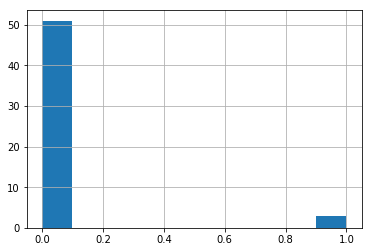

In [24]:
"""Посмотрим к какому классу относятся пропуски"""
data[data.f27==-1].y.hist()

In [25]:
"""Выберем в качестве целевой переменной класс породы- это переменная y"""
target_col=['y']

In [26]:
"""Выделим только вещественные признаки для простоты, воспользуясь list_comprehension"""
float_col=[col for col in data.columns if (data[col].dtypes=='float' or data[col].dtypes=='int')and col not in target_col+bin_col]

In [29]:
sns.set()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cb88eb8>,
      dtype=object)

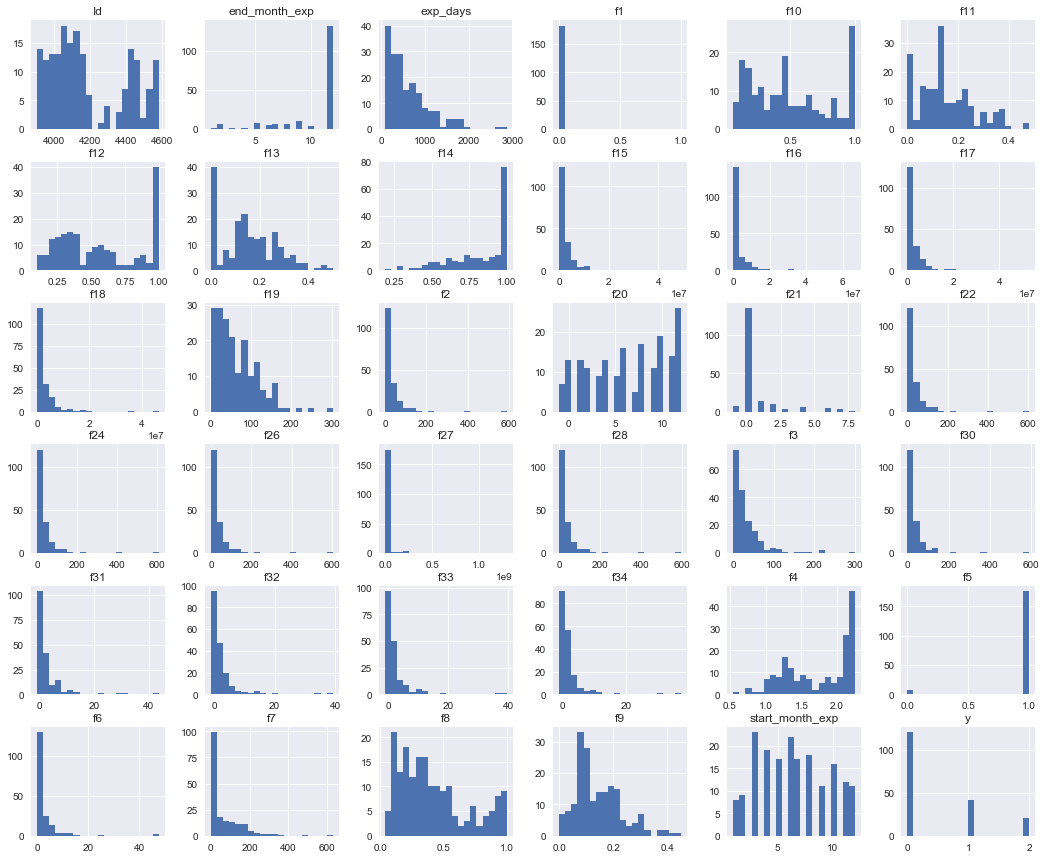

In [30]:
"""Посмотрим на распределение признаков"""
data.hist(figsize=(18,15), bins=20)

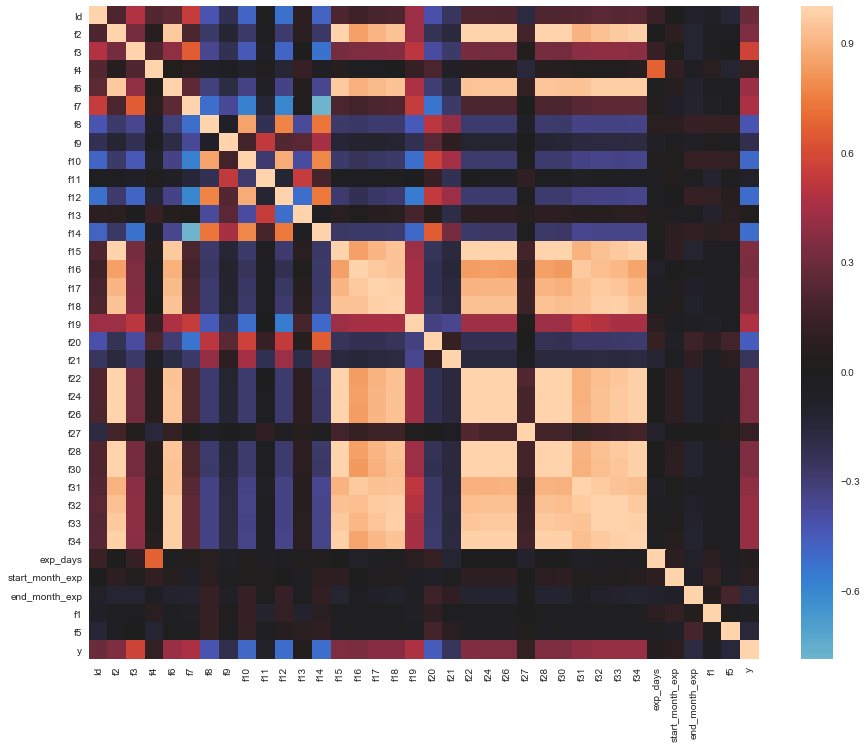

In [31]:
# calculate the correlation matrix
corr = data[float_col+bin_col+target_col].corr()
plt.figure(figsize=(15,12))
# plot the heatmap
sns.heatmap(corr, center=0,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

### Моделирование

In [32]:
X=data[float_col+bin_col]
Y=data[target_col]

In [64]:
X_train, X_test, y_train, y_test=train_test_split(X[float_col+bin_col], Y, test_size=0.2, random_state=42)

### K-Nn

In [65]:
MinMax=MinMaxScaler()
MinMax.fit(X_train[float_col])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [66]:
#объеденим по вертикали "склеим" данные бинарные с вещественными
X_t_minmax=np.hstack((MinMax.transform(X_train[float_col]),X_train[bin_col])) 
X_te_minmax=np.hstack((MinMax.transform(X_test[float_col]),X_test[bin_col]))

In [67]:
knn=KNeighborsClassifier(3, algorithm='brute')

In [68]:
knn.fit(X_t_minmax, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [69]:
knn.score(X_te_minmax,y_test)*100

64.86486486486487

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


K is:  2 |Accuracy is:  0.7297297297297297
K is:  3 |Accuracy is:  0.6486486486486487
K is:  4 |Accuracy is:  0.7027027027027027
K is:  5 |Accuracy is:  0.7027027027027027
K is:  6 |Accuracy is:  0.7027027027027027
K is:  7 |Accuracy is:  0.6756756756756757
K is:  8 |Accuracy is:  0.6756756756756757
K is:  9 |Accuracy is:  0.6756756756756757
K is:  10 |Accuracy is:  0.6756756756756757


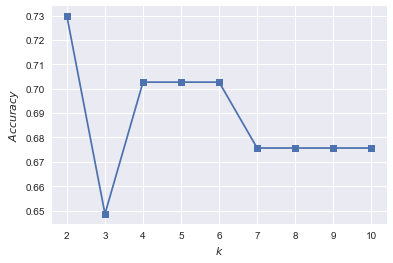

In [70]:
"""Изобразим график обучения"""
scores=[]
for k in range(2, 11):
    knn=KNeighborsClassifier(k).fit(X_t_minmax, y_train)
    scores.append(knn.score(X_te_minmax,y_test))
    print('K is: ', k,'|Accuracy is: ', knn.score(X_te_minmax,y_test))
plt.plot(range(2, 11), scores, marker='s');
plt.xlabel('$k$')
plt.ylabel('$Accuracy$');

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


K is:  2 |Accuracy is:  0.5945945945945946
K is:  3 |Accuracy is:  0.6216216216216216
K is:  4 |Accuracy is:  0.5675675675675675
K is:  5 |Accuracy is:  0.6486486486486487
K is:  6 |Accuracy is:  0.6216216216216216
K is:  7 |Accuracy is:  0.7027027027027027
K is:  8 |Accuracy is:  0.7027027027027027
K is:  9 |Accuracy is:  0.6486486486486487
K is:  10 |Accuracy is:  0.6216216216216216


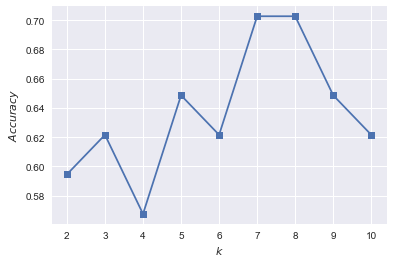

In [71]:
"""Изобразим график обучения но для не нормированных данных"""
scores=[]
for k in range(2, 11):
    knn=KNeighborsClassifier(k).fit(X_train, y_train)
    scores.append(knn.score(X_test,y_test))
    print('K is: ', k,'|Accuracy is: ', knn.score(X_test,y_test))
plt.plot(range(2, 11), scores, marker='s');
plt.xlabel('$k$')
plt.ylabel('$Accuracy$');

### LogisticRegression

In [72]:
lr=LogisticRegression(C=0.01, penalty='l2')

In [73]:
"""Т.к. линейные модели чувствительны к масштабу и требуют `нормальности` """
std_scaler=StandardScaler()
std_scaler.fit(X_train[float_col])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [74]:
X_t_std=np.hstack((std_scaler.transform(X_train[float_col]),X_train[bin_col]))
X_te_std=np.hstack((std_scaler.transform(X_test[float_col]),X_test[bin_col]))

In [75]:
lr.fit(X_t_std, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
100*lr.score(X_te_std, y_test)

62.16216216216216

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


alpha is:  0.01 |Accuracy is:  0.6216216216216216
alpha is:  0.1 |Accuracy is:  0.6756756756756757
alpha is:  0.5 |Accuracy is:  0.6756756756756757
alpha is:  1 |Accuracy is:  0.6756756756756757
alpha is:  10 |Accuracy is:  0.7027027027027027
alpha is:  100 |Accuracy is:  0.5945945945945946


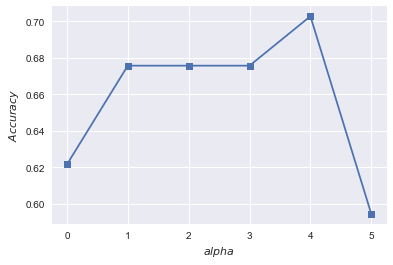

In [77]:
"""Изобразим график обучения для разных показателей регуляризации С"""
scores=[]
for alpha in [0.01, 0.1, 0.5, 1, 10, 100]:
    lr=LogisticRegression(C=alpha, penalty='l2').fit(X_t_std, y_train)
    scores.append(lr.score(X_te_std, y_test))
    print('alpha is: ', alpha,'|Accuracy is: ', lr.score(X_te_std, y_test))
plt.plot(range(len([0.01, 0.1, 0.5, 1, 10, 100])), scores, marker='s');
plt.xlabel('$alpha$')
plt.ylabel('$Accuracy$');

### SVM

In [78]:
svm = SVC(C=0.1, kernel='linear')

In [79]:
svm.fit(X_t_std, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [80]:
svm.score(X_te_std,y_test)*100

70.27027027027027

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


alpha is:  0.01 |Accuracy is:  0.7297297297297297
alpha is:  0.1 |Accuracy is:  0.7027027027027027
alpha is:  0.5 |Accuracy is:  0.7027027027027027
alpha is:  1 |Accuracy is:  0.6756756756756757
alpha is:  10 |Accuracy is:  0.6216216216216216
alpha is:  100 |Accuracy is:  0.5945945945945946


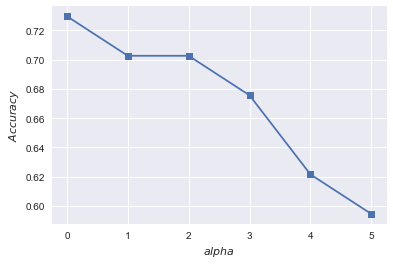

In [81]:
"""Изобразим график обучения для разных показателей регуляризации С"""
scores=[]
for alpha in [0.01, 0.1, 0.5, 1, 10, 100]:
    svm = SVC(C=alpha, kernel='linear').fit(X_t_std, y_train)
    scores.append(svm.score(X_te_std, y_test))
    print('alpha is: ', alpha,'|Accuracy is: ', svm.score(X_te_std, y_test))
plt.plot(range(len([0.01, 0.1, 0.5, 1, 10, 100])), scores, marker='s');
plt.xlabel('$alpha$')
plt.ylabel('$Accuracy$');

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


alpha is:  0.01 |Accuracy is:  0.7027027027027027
alpha is:  0.1 |Accuracy is:  0.7027027027027027
alpha is:  0.5 |Accuracy is:  0.6756756756756757
alpha is:  1 |Accuracy is:  0.7027027027027027
alpha is:  10 |Accuracy is:  0.7027027027027027
alpha is:  100 |Accuracy is:  0.6756756756756757


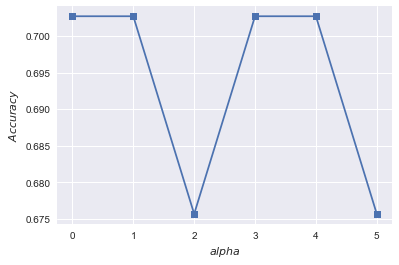

In [82]:
"""Изобразим график обучения для разных показателей регуляризации С для другого ядря, например 'rbf' """
scores=[]
for alpha in [0.01, 0.1, 0.5, 1, 10, 100]:
    svm = SVC(C=alpha, kernel='rbf').fit(X_t_std, y_train)
    scores.append(svm.score(X_te_std, y_test))
    print('alpha is: ', alpha,'|Accuracy is: ', svm.score(X_te_std, y_test))
plt.plot(range(len([0.01, 0.1, 0.5, 1, 10, 100])), scores, marker='s');
plt.xlabel('$alpha$')
plt.ylabel('$Accuracy$');

### RandomForest

In [83]:
rf=RandomForestClassifier(random_state=42)

In [84]:
rf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [85]:
rf.score(X_test, y_test)

0.7027027027027027

Estimators is:  10 |Accuracy is:  0.7027027027027027
Estimators is:  30 |Accuracy is:  0.7297297297297297
Estimators is:  50 |Accuracy is:  0.7297297297297297
Estimators is:  70 |Accuracy is:  0.7297297297297297
Estimators is:  90 |Accuracy is:  0.7297297297297297
Estimators is:  110 |Accuracy is:  0.7297297297297297


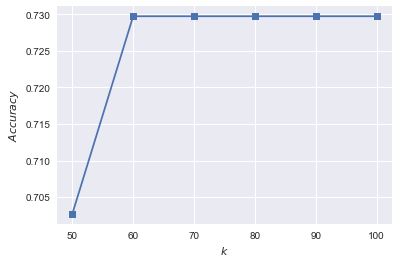

In [86]:
"""Изобразим график обучения и посмотрим как число деревьев в лесу влияет на точность"""
scores=[]
for n in np.arange(10,120,20):
    rf=RandomForestClassifier(n_estimators=n,random_state=42).fit(X_train, y_train.y)
    scores.append(rf.score(X_test, y_test.y))
    print('Estimators is: ', n,'|Accuracy is: ', rf.score(X_test, y_test.y))
plt.plot(range(50, 110, 10), scores, marker='s');
plt.xlabel('$k$')
plt.ylabel('$Accuracy$');